## Bike Sharing Analysis

### Data dictionary

- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
    

### Step1: Reading and understanding data

In [1]:
# importing required libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

In [2]:
# importing the data
data = pd.read_csv("data.csv") 
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
data.shape

(730, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
data['dteday'] = pd.to_datetime(data['dteday'],format = "%d-%m-%Y")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [8]:
categorical_var = ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit']

numerical_var =  ['temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']

### Step 2: Visualising Data

#### Visualising numerical variables

In [9]:
# importing required libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# sns.pairplot(data, x_vars = ['instant', 'dteday', 'season', 'yr', 'mnth'],y_vars='cnt')
# plt.show()

In [11]:
# sns.pairplot(data, x_vars = ['holiday', 'weekday',
#        'workingday', 'weathersit'],y_vars='cnt')
# plt.show()

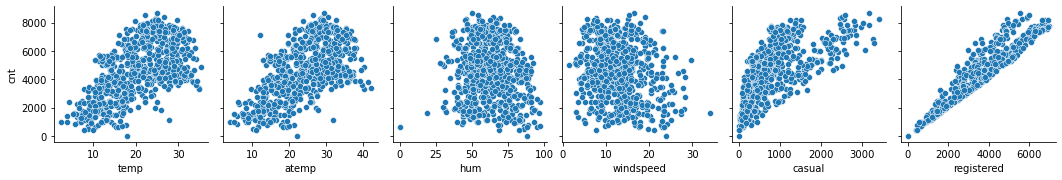

In [12]:
sns.pairplot(data, x_vars = ['temp','atemp', 'hum', 'windspeed',
       'casual', 'registered'],y_vars='cnt')
plt.show()

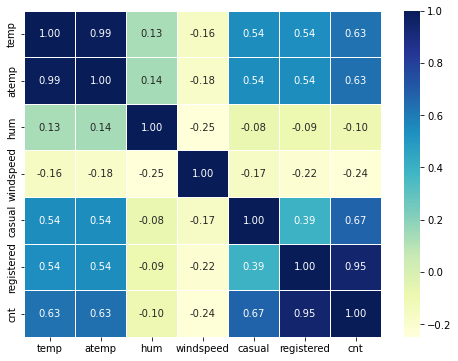

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(data[numerical_var].corr(),annot = True,cmap="YlGnBu",linewidth=.5, fmt = '.2f')
plt.show()

#### Visualising categorical variables

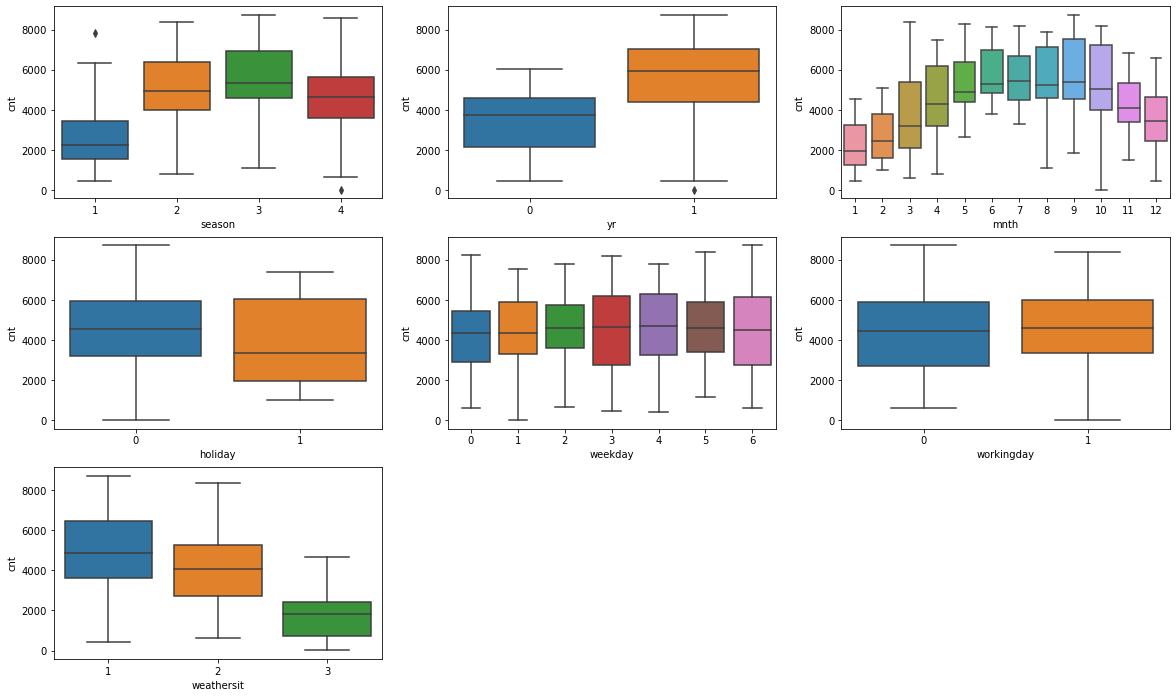

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()

## Step 3: Data Preparation

In [15]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Dropping columns
	- 'instant' can be dropped as it is only the record index
	- 'dteday' is the date. From the perspective of this modelling the important features which might hold some relevant information are month and year whic are already extracted and represented in variables 'mnth', 'yr' and 'weekday'. Thus, it should be dropped as it is not adding any additional info.

In [16]:
data_clean = data.drop(['instant','dteday'],axis = 1)

In [17]:
data_clean.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Adding dummy variables

    - season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr
	- mnth
	- holiday 
	- weekday 
	- workingday
	- weathersit

In [18]:
season = pd.get_dummies(data_clean['season'], prefix = 'season', drop_first = True)
weathersit = pd.get_dummies(data_clean['weathersit'], prefix = 'weathersit', drop_first = True)
weekday = pd.get_dummies (data_clean['weekday'], prefix = 'weekday', drop_first = True)

In [19]:
season

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


In [20]:
data_clean = pd.concat([data_clean, season, weathersit, weekday],axis = 1)

In [21]:
data_clean = data_clean.drop(['season','weathersit','weekday'],axis = 1)

In [22]:
# creating a derived metric for registered user as perc of total and dropping causal and registered users field

data_clean['registered_ratio'] = data_clean['registered']/data_clean['cnt']
data_clean.pop('registered')
data_clean.pop('casual')
data_clean.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,...,season_4,weathersit_2,weathersit_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,registered_ratio
0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,0,...,0,1,0,0,0,0,0,0,1,0.663959
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,...,0,1,0,0,0,0,0,0,0,0.836454
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,1,0,0,0,0,0,0.911045
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,1,0,0,0,0,0.930858
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,1,0,0,0,0.948750


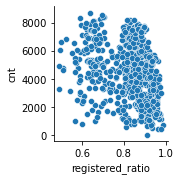

In [23]:
sns.pairplot(data_clean, x_vars =  'registered_ratio',y_vars='cnt')
plt.show()

In [24]:
categorical_var = ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit']

numerical_var =  ['temp', 'atemp', 'hum', 'windspeed',
       'registered_ratio', 'cnt']

## Step 4: Splitting Data into train and test

In [25]:
# import required libraries

from sklearn.model_selection import train_test_split

np.random.seed(100) 
df_train, df_test = train_test_split(data_clean, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the features

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
df_train[numerical_var] = scaler.fit_transform(df_train[numerical_var])

In [28]:
df_train[numerical_var]

,temp,atemp,hum,windspeed,registered_ratio,cnt
653,-0.121335,-0.055878,-0.514725,-0.117752,0.488465,1.562685
576,1.231731,1.194106,0.516433,-0.330615,0.378247,1.399629
426,-0.420478,-0.348834,-0.069854,-0.385694,-0.567484,-0.215554
728,-1.294913,-1.473492,-1.045032,2.018143,-0.263574,-1.379511
482,-0.627580,-0.571474,-1.000840,-0.779889,-0.851110,-0.136589
...,...,...,...,...,...,...
526,1.273152,1.174464,-0.305544,0.205320,0.205306,1.116587
578,1.448040,1.467501,0.201190,-0.787759,0.366685,1.422703
53,-1.483204,-1.386775,-1.471329,-1.234384,0.955546,-1.317467
350,-1.281106,-1.364170,-0.497048,0.654645,0.694303,-0.895981


#### Dividing into X and Y for model building

In [29]:
y_train = df_train.pop('cnt')
X_train = df_train


In [30]:
y_train

653    1.562685
576    1.399629
426   -0.215554
728   -1.379511
482   -0.136589
         ...   
526    1.116587
578    1.422703
53    -1.317467
350   -0.895981
79    -1.235426
Name: cnt, Length: 510, dtype: float64

## Step 5: Building a model

In [31]:
# Importing RFE and linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10)
rfe = rfe.fit(X_train,y_train)

In [33]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 11),
 ('holiday', False, 2),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', False, 5),
 ('windspeed', False, 3),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('weekday_1', False, 10),
 ('weekday_2', False, 8),
 ('weekday_3', False, 4),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', True, 1),
 ('registered_ratio', True, 1)]

In [34]:
col = X_train.columns[rfe.support_]

### Building model using the Stats model

In [35]:
X_train_rfe = X_train[col]

#import relevant libraries
import statsmodels.api as sm

#Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [36]:
lm_1 = sm.OLS(y_train, X_train_rfe).fit()

In [37]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.5
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          6.00e-187
Time:                        17:52:50   Log-Likelihood:                -266.80
No. Observations:                 510   AIC:                             555.6
Df Residuals:                     499   BIC:                             602.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.3414      0.082  

In [38]:
# Calculate VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1]) ]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,20.12
5,season_3,4.69
10,registered_ratio,4.39
2,workingday,4.20
3,temp,4.05
4,season_2,2.63
6,season_4,1.81
9,weekday_6,1.63
8,weathersit_3,1.08
7,weathersit_2,1.06


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [39]:
y_train_cnt = lm_1.predict(X_train_rfe)

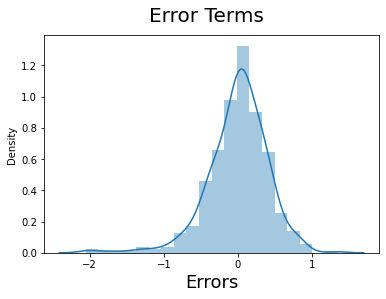

In [40]:
# importing relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# plot histogram of error terms
fig = plt.figure()
sns.distplot( (y_train - y_train_cnt),bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)  
plt.show()

### Making Predictions

In [41]:
df_test = sm.add_constant(df_test)
df_test[numerical_var] = scaler.fit_transform(df_test[numerical_var])
X_test = df_test[X_train_rfe.columns]

y_test = df_test['cnt']

In [42]:
y_train_cnt

653    1.034202
576    1.215583
426   -0.265443
728   -0.657416
482    0.168799
         ...   
526    0.994171
578    1.298342
53    -1.446881
350   -1.255515
79    -0.577760
Length: 510, dtype: float64

In [43]:
y_test_pred = lm_1.predict(X_test)

Text(0, 0.5, 'y_pred')

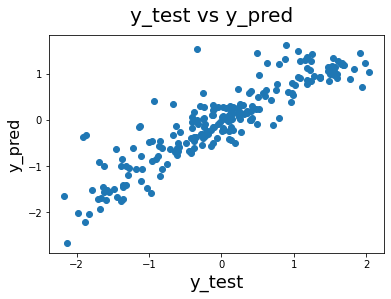

In [44]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [45]:
# r-squared for the test set

from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8097300581604068